Project by:

Vidhi Vazirani 

Vaishanvi Singh 


## ChatBots

Chatbots, also called chatterbots, is a form of artificial intelligence (AI) used in messaging apps. This tool helps add convenience for customers—they are automated programs that interact with customers like a human would and cost little to nothing to engage with.

Have applications in various areas like:
1. Healthcare
2. Education
3. Customer Service
4. Making Reservations 




## Intent Recongnition and Classification

Intent recognition is a form of natural language processing (NLP), a subfield of artificial intelligence. NLP is concerned with computers processing and analyzing natural language, i.e., any language that has developed naturally, rather than artificially, such as with computer coding languages.

## Loading and exploring the dataset

The json file is loaded and the intents data is explored to understand the structure of the dataset.

In [ ]:
# loading data from json file
import json
data = 'Intent.json'
with open(data) as f:
  intents=json.load(f)

In [ ]:
# exploring data
intents

{'intents': [{'context': {'clear': False,
    'in': '',
    'out': 'GreetingUserRequest'},
   'entities': [],
   'entityType': 'NA',
   'extension': {'entities': False, 'function': '', 'responses': []},
   'intent': 'Greeting',
   'responses': ['Hi human, please tell me your GeniSys user',
    'Hello human, please tell me your GeniSys user',
    'Hola human, please tell me your GeniSys user'],
   'text': ['Hi',
    'Hi there',
    'Hola',
    'Hello',
    'Hello there',
    'Hya',
    'Hya there']},
  {'context': {'clear': True, 'in': 'GreetingUserRequest', 'out': ''},
   'entities': [{'entity': 'HUMAN', 'rangeFrom': 3, 'rangeTo': 4},
    {'entity': 'HUMAN', 'rangeFrom': 2, 'rangeTo': 3},
    {'entity': 'HUMAN', 'rangeFrom': 1, 'rangeTo': 2},
    {'entity': 'HUMAN', 'rangeFrom': 2, 'rangeTo': 3},
    {'entity': 'HUMAN', 'rangeFrom': 3, 'rangeTo': 4},
    {'entity': 'HUMAN', 'rangeFrom': 2, 'rangeTo': 3},
    {'entity': 'HUMAN', 'rangeFrom': 1, 'rangeTo': 2},
    {'entity': 'HUMAN', 'ra

In [ ]:
len(intents['intents'])

22

## Preprocessing

Replace Multiple blank spaces with a single blank space and replace all unwated characters with a blank space. 

In [ ]:
# preprocess the data

import re     # importing the regular expressions library

def preprocess(text):
  text = re.sub(r'[,-]', ' ', text)   # Replaces any char as mentioned with a space
  text = re.sub(r'[ ]+', ' ', text)   # Replaces multiple space with a signle space
  return text

## Segregating the dataset

classes - Stores the various classes input can be classifed into

inputs - Stores the Input text

targets - Stores the class of the corresponding input item

output - Stores the Response

In [ ]:
# segretating the data

classes = []
inputs = []
targets = []
output = {}

for intent in intents['intents']:
    if intent['intent'] not in classes:
        classes.append(intent['intent'])
    if intent['intent'] not in output:
        output[intent['intent']] = []
        
    for text in intent['text']:
        inputs.append(preprocess(text))
        targets.append(intent['intent'])
        
    for response in intent['responses']:
        output[intent['intent']].append(response)

In [ ]:
classes
# len(classes)

['Greeting',
 'GreetingResponse',
 'CourtesyGreeting',
 'CourtesyGreetingResponse',
 'CurrentHumanQuery',
 'NameQuery',
 'RealNameQuery',
 'TimeQuery',
 'Thanks',
 'NotTalking2U',
 'UnderstandQuery',
 'Shutup',
 'Swearing',
 'GoodBye',
 'CourtesyGoodBye',
 'WhoAmI',
 'Clever',
 'Gossip',
 'Jokes',
 'PodBayDoor',
 'PodBayDoorResponse',
 'SelfAware']

In [ ]:
for i in range (0,10):
  print(inputs[i],':',targets[i])

Hi : Greeting
Hi there : Greeting
Hola : Greeting
Hello : Greeting
Hello there : Greeting
Hya : Greeting
Hya there : Greeting
My user is Adam : GreetingResponse
This is Adam : GreetingResponse
I am Adam : GreetingResponse


In [ ]:
output ['TimeQuery']

['One moment', 'One sec', 'One second']

In [ ]:
output ['NotTalking2U']

['OK', 'No problem', 'Right']

In [ ]:
output ['Shutup']

['I am sorry to disturb you',
 'Fine, sorry to disturb you',
 'OK, sorry to disturb you']

In [ ]:
output ['Swearing']

['Please do not swear', 'How rude', 'That is not very nice']

In [ ]:
# actual representation of output dict
list(output.items())[0:3]

[('Greeting',
  ['Hi human, please tell me your GeniSys user',
   'Hello human, please tell me your GeniSys user',
   'Hola human, please tell me your GeniSys user']),
 ('GreetingResponse',
  ['Great! Hi <HUMAN>! How can I help?',
   'Good! Hi <HUMAN>, how can I help you?',
   'Cool! Hello <HUMAN>, what can I do for you?',
   'OK! Hola <HUMAN>, how can I help you?',
   'OK! hi <HUMAN>, what can I do for you?']),
 ('CourtesyGreeting',
  ['Hello, I am great, how are you? Please tell me your GeniSys user',
   'Hello, how are you? I am great thanks! Please tell me your GeniSys user',
   'Hello, I am good thank you, how are you? Please tell me your GeniSys user',
   'Hi, I am great, how are you? Please tell me your GeniSys user',
   'Hi, how are you? I am great thanks! Please tell me your GeniSys user',
   'Hi, I am good thank you, how are you? Please tell me your GeniSys user',
   'Hi, good thank you, how are you? Please tell me your GeniSys user'])]

## Tokenization


*   Helps in processing data to be fed to the network
*   Token - small units of language
*   Tokens can be words, subwords or characters
*   Here, we are separating the text (data) using the most common technique of tokenization - spaces





In [ ]:
import tensorflow as tf

In [ ]:
def tokenize_data(input_list):
    tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='', oov_token='<unk>')
    tokenizer.fit_on_texts(input_list)
    # print(input_list[0:10])
    input_seq = tokenizer.texts_to_sequences(input_list)
    # print(input_seq[0:10])
    input_seq = tf.keras.preprocessing.sequence.pad_sequences(input_seq, padding='pre')
    # print(input_seq[0:10])
    return tokenizer, input_seq

# tokenize input data
tokenizer, input_tensor = tokenize_data(inputs)

In [ ]:
input_tensor    # the final input tensor that will be fed to the RNN

array([[ 0,  0,  0, ...,  0,  0, 54],
       [ 0,  0,  0, ...,  0, 54, 55],
       [ 0,  0,  0, ...,  0,  0, 70],
       ...,
       [ 0, 10,  2, ..., 52, 53, 22],
       [ 0, 10,  2, ..., 14, 69, 22],
       [ 0,  0,  0, ..., 68, 14, 69]], dtype=int32)

In [ ]:
input_tensor.shape

(143, 9)

In [ ]:
# processing the output
def process_output(targets):
    word={}
    categorical_target=[]
    counter=0
    for trg in targets:
        if trg not in word:
            word[trg]=counter
            counter+=1
        categorical_target.append(word[trg])
    print(word)
    print(categorical_target)
    categorical_tensor = tf.keras.utils.to_categorical(categorical_target, num_classes=len(word), dtype='int32')
    return categorical_tensor, dict((v,k) for k, v in word.items())

target_tensor, trg_index_word = process_output(targets)

{'Greeting': 0, 'GreetingResponse': 1, 'CourtesyGreeting': 2, 'CourtesyGreetingResponse': 3, 'CurrentHumanQuery': 4, 'NameQuery': 5, 'RealNameQuery': 6, 'TimeQuery': 7, 'Thanks': 8, 'NotTalking2U': 9, 'UnderstandQuery': 10, 'Shutup': 11, 'Swearing': 12, 'GoodBye': 13, 'CourtesyGoodBye': 14, 'WhoAmI': 15, 'Clever': 16, 'Gossip': 17, 'Jokes': 18, 'PodBayDoor': 19, 'PodBayDoorResponse': 20, 'SelfAware': 21}
[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21]


In [ ]:
target_tensor

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int32)

In [ ]:
target_tensor.shape

(143, 22)

## Long Short Term Memory (LSTM)
*   Type of recurrent neural network (RNN)
*   Capable of learning order dependence in sequence prediction problems
*   Works using three gates :


>1.   Forget Gate
2.   Input/Update Gate
3. Output Gate










In [ ]:
from tensorflow.keras.models import Sequential          # stack layers in network
from tensorflow.keras.layers import Embedding           # helps in compressing the input 
from tensorflow.keras.layers import Bidirectional       # create 2 layers
from tensorflow.keras.layers import Dense               # creates a fully connected layer
from tensorflow.keras.layers import Dropout             # disables neurons
from tensorflow.keras.layers import LSTM                # creates an LSTM network

In [ ]:
# hyperparameters
epoch1=10
vocab_size=len(tokenizer.word_index) + 1
embed_dim=512
units=128
target_length=target_tensor.shape[1]

model1 = Sequential([
    Embedding(vocab_size, embed_dim),
    Bidirectional(LSTM(units, dropout=0.2)),
    Dense(units, activation='relu'),
    Dropout(0.5),
    Dense(target_length, activation='softmax')
])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         66048     
_________________________________________________________________
bidirectional (Bidirectional (None, 256)               656384    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 22)                2838      
Total params: 758,166
Trainable params: 758,166
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history1 = model1.fit(input_tensor, target_tensor, epochs=epoch1)

Epoch 1/10
5/5 [==============================] - 4s 66ms/step - loss: 3.0855 - accuracy: 0.0628
Epoch 2/10
5/5 [==============================] - 0s 59ms/step - loss: 3.0488 - accuracy: 0.1079
Epoch 3/10
5/5 [==============================] - 0s 62ms/step - loss: 3.0140 - accuracy: 0.0698
Epoch 4/10
5/5 [==============================] - 0s 60ms/step - loss: 2.9331 - accuracy: 0.2093
Epoch 5/10
5/5 [==============================] - 0s 59ms/step - loss: 2.8821 - accuracy: 0.2216
Epoch 6/10
5/5 [==============================] - 0s 58ms/step - loss: 2.7878 - accuracy: 0.2587
Epoch 7/10
5/5 [==============================] - 0s 60ms/step - loss: 2.6155 - accuracy: 0.3509
Epoch 8/10
5/5 [==============================] - 0s 60ms/step - loss: 2.4086 - accuracy: 0.4082
Epoch 9/10
5/5 [==============================] - 0s 58ms/step - loss: 2.0879 - accuracy: 0.4356
Epoch 10/10
5/5 [==============================] - 0s 61ms/step - loss: 1.8734 - accuracy: 0.4739


In [ ]:
acc1 = history1.history['accuracy']

In [ ]:
# hyperparameters
epoch2=15
vocab_size=len(tokenizer.word_index) + 1
embed_dim=512
units=128
target_length=target_tensor.shape[1]

model2 = Sequential([
    Embedding(vocab_size, embed_dim),
    Bidirectional(LSTM(units, dropout=0.2)),
    Dense(units, activation='relu'),
    Dropout(0.5),
    Dense(target_length, activation='softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 512)         66048     
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               656384    
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 22)                2838      
Total params: 758,166
Trainable params: 758,166
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = model2.fit(input_tensor, target_tensor, epochs=epoch2)

Epoch 1/15
5/5 [==============================] - 4s 62ms/step - loss: 3.0857 - accuracy: 0.0688
Epoch 2/15
5/5 [==============================] - 0s 64ms/step - loss: 3.0406 - accuracy: 0.2142
Epoch 3/15
5/5 [==============================] - 0s 62ms/step - loss: 3.0115 - accuracy: 0.1788
Epoch 4/15
5/5 [==============================] - 0s 61ms/step - loss: 2.9552 - accuracy: 0.1717
Epoch 5/15
5/5 [==============================] - 0s 64ms/step - loss: 2.8614 - accuracy: 0.2207
Epoch 6/15
5/5 [==============================] - 0s 60ms/step - loss: 2.7167 - accuracy: 0.3713
Epoch 7/15
5/5 [==============================] - 0s 57ms/step - loss: 2.5749 - accuracy: 0.2868
Epoch 8/15
5/5 [==============================] - 0s 58ms/step - loss: 2.3715 - accuracy: 0.3901
Epoch 9/15
5/5 [==============================] - 0s 61ms/step - loss: 2.1545 - accuracy: 0.4816
Epoch 10/15
5/5 [==============================] - 0s 63ms/step - loss: 1.8624 - accuracy: 0.5349
Epoch 11/15
5/5 [============

In [ ]:
acc2 = history2.history['accuracy']

In [ ]:
# hyperparameters
epoch3=20
vocab_size=len(tokenizer.word_index) + 1
embed_dim=512
units=128
target_length=target_tensor.shape[1]

model3 = Sequential([
    Embedding(vocab_size, embed_dim),
    Bidirectional(LSTM(units, dropout=0.2)),
    Dense(units, activation='relu'),
    Dropout(0.5),
    Dense(target_length, activation='softmax')
])
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 512)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               656384    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 22)                2838      
Total params: 758,166
Trainable params: 758,166
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history3 = model3.fit(input_tensor, target_tensor, epochs=epoch3)

Epoch 1/20
5/5 [==============================] - 4s 62ms/step - loss: 3.0898 - accuracy: 0.0861
Epoch 2/20
5/5 [==============================] - 0s 62ms/step - loss: 3.0532 - accuracy: 0.0940
Epoch 3/20
5/5 [==============================] - 0s 59ms/step - loss: 2.9965 - accuracy: 0.2279
Epoch 4/20
5/5 [==============================] - 0s 60ms/step - loss: 2.9722 - accuracy: 0.1942
Epoch 5/20
5/5 [==============================] - 0s 60ms/step - loss: 2.8917 - accuracy: 0.2706
Epoch 6/20
5/5 [==============================] - 0s 59ms/step - loss: 2.7328 - accuracy: 0.3644
Epoch 7/20
5/5 [==============================] - 0s 60ms/step - loss: 2.5874 - accuracy: 0.3525
Epoch 8/20
5/5 [==============================] - 0s 60ms/step - loss: 2.3831 - accuracy: 0.3578
Epoch 9/20
5/5 [==============================] - 0s 59ms/step - loss: 2.1509 - accuracy: 0.2960
Epoch 10/20
5/5 [==============================] - 0s 59ms/step - loss: 1.6834 - accuracy: 0.5049
Epoch 11/20
5/5 [============

In [ ]:
acc3 = history3.history['accuracy']

In [ ]:
# hyperparameters
epoch4=25
vocab_size=len(tokenizer.word_index) + 1
embed_dim=512
units=128
target_length=target_tensor.shape[1]

model4 = Sequential([
    Embedding(vocab_size, embed_dim),
    Bidirectional(LSTM(units, dropout=0.2)),
    Dense(units, activation='relu'),
    Dropout(0.5),
    Dense(target_length, activation='softmax')
])
model4.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 512)         66048     
_________________________________________________________________
bidirectional_5 (Bidirection (None, 256)               656384    
_________________________________________________________________
dense_10 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 22)                2838      
Total params: 758,166
Trainable params: 758,166
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history4 = model4.fit(input_tensor, target_tensor, epochs=epoch4)

Epoch 1/25
5/5 [==============================] - 4s 59ms/step - loss: 3.0883 - accuracy: 0.0495
Epoch 2/25
5/5 [==============================] - 0s 58ms/step - loss: 3.0548 - accuracy: 0.1121
Epoch 3/25
5/5 [==============================] - 0s 58ms/step - loss: 3.0034 - accuracy: 0.1286
Epoch 4/25
5/5 [==============================] - 0s 60ms/step - loss: 2.9805 - accuracy: 0.2260
Epoch 5/25
5/5 [==============================] - 0s 57ms/step - loss: 2.9237 - accuracy: 0.2923
Epoch 6/25
5/5 [==============================] - 0s 59ms/step - loss: 2.7720 - accuracy: 0.3554
Epoch 7/25
5/5 [==============================] - 0s 61ms/step - loss: 2.7146 - accuracy: 0.2850
Epoch 8/25
5/5 [==============================] - 0s 57ms/step - loss: 2.5007 - accuracy: 0.3459
Epoch 9/25
5/5 [==============================] - 0s 58ms/step - loss: 2.2188 - accuracy: 0.4102
Epoch 10/25
5/5 [==============================] - 0s 58ms/step - loss: 1.8962 - accuracy: 0.4219
Epoch 11/25
5/5 [============

In [ ]:
acc4 = history4.history['accuracy']

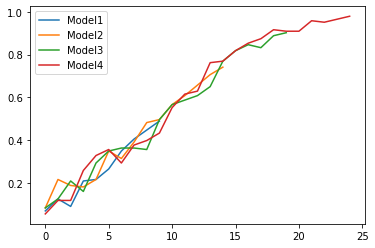

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'], label='Model1')
plt.plot(history2.history['accuracy'], label='Model2')
plt.plot(history3.history['accuracy'], label='Model3')
plt.plot(history4.history['accuracy'], label='Model4')
plt.legend()

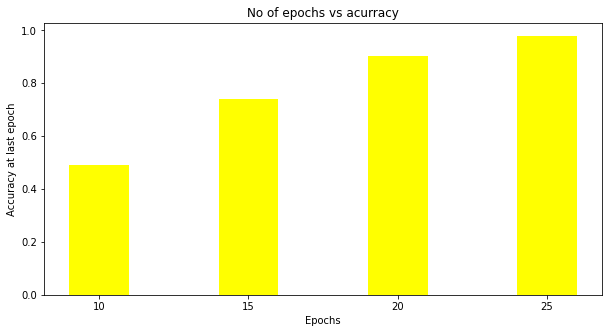

In [ ]:
epochs=['10','15','20','25']
accuracy=[acc1[-1],acc2[-1],acc3[-1],acc4[-1]]
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(epochs, accuracy, color ='yellow',
        width = 0.4)
 
plt.xlabel("Epochs")
plt.ylabel("Accuracy at last epoch")
plt.title("No of epochs vs acurracy")
plt.show()

## Conclusion

We found that when number of epochs was increased to 25, we got a statisfactory accuracy. Thus we select model3 to be our final RNN model.

Details of the model:


*   Epochs = 25
* Layers:
>*   Embedding layer
>*   LSTM layer
>*   1 dense layer
>*   50% Dropout
>*   Output Layer
* Accuarcy = 97 (approx.)



## Implementing the chatbot



In [ ]:
import numpy as np
import random
import spacy
nlp = spacy.load('en_core_web_sm')

def response(sentence):
    sent_seq = []
    doc = nlp(repr(sentence))
    
    # split the input sentences into words
    for token in doc:
        if token.text in tokenizer.word_index:
            sent_seq.append(tokenizer.word_index[token.text])

        # handle the unknown words error
        else:
            sent_seq.append(tokenizer.word_index['<unk>'])
    
    sent_seq = tf.expand_dims(sent_seq, 0)
    # predict the category of input sentences
    pred = model4(sent_seq)
    
    pred_class = np.argmax(pred.numpy(), axis=1)

    return random.choice(output[trg_index_word[pred_class[0]]]), trg_index_word[pred_class[0]]

# chat with bot
print("Note: Enter 'exit' to break the loop.")
while True:
    input_ = input('You: ')
    if input_.lower() == 'exit':
        break
    res, typ = response(input_)
    print('Bot: {} -- TYPE: {}'.format(res, typ))
    print()

Note: Enter 'exit' to break the loop.
You: hi
Bot: Hola human, please tell me your GeniSys user -- TYPE: Greeting

You: tell me joke
Bot: What did the plumber say when he wanted to divorce his wife? Sorry, but it's over, Flo! -- TYPE: Jokes

You: give me gossip
Bot: Ross said he gave her a gift and she denied it because she has a boyfriend. -- TYPE: Gossip

You: exit
